In [73]:
import pandas as pd
import numpy as np

# Basic Exploratory Data Analysis:
## Financial Well-Being Survey
Consumer Financial Protection Bureau (CFPB), 2017

#### Items to address
* What questions can we address with each of these data sets?
* Breakdown of Financial Literacy Education & Behaviors, Home Ownership, Debt-to-Income by Demographic Information (Race/Ethnicity, Age, Gender, etc.)
* Any correlation between financial literacy education and each of our financial success metrics? Any differences among different demographics?
* Include data visualizations where appropriate


In [74]:
df = pd.read_csv("./NFWBS_PUF_2016_data.csv")

In [75]:
# Columns that most relate to our problem statement
columns_of_interest = [
    'PUF_ID',
    'agecat',
    'PPEDUC',
    'PPETHM',
    'PPGENDER',
    'PPINCIMP',
    'PPHHSIZE',
    'fpl',
    'PPREG4',
    'PPREG9',
    'FWB1_1',
    'FWB1_5',
    'FS2_3',
    'SUBKNOWL1',
    'ACT1_2',
    'PROPPLAN_3',
    'PROPPLAN_1',
    'MANAGE1_2',
    'MANAGE1_1',
    'MANAGE1_3',
    'SAVEHABIT',
    'AUTOMATED_1',
    'AUTOMATED_2',
    'SAVINGSRANGES',
    'HOUSING',
    'HOUSERANGES',
    'MORTGAGE',
    'PRODHAVE_8',
    'PRODUSE_1',
    'PRODUSE_2',
    'FWBscore',
    'FSscore'
]

In [76]:
# Column mapping to variable label; might come in handy when doing EDA
col_map = {
    'agecat':'Age Group',
    'PPEDUC':'Education (Highest Degree)',
    'PPETHM':'Race/Ethnicity',
    'PPGENDER':'Gender',
    'PPINCIMP':'Household Income',
    'PPHHSIZE':'Household Size',
    'fpl':'Federal Poverty Level',
    'PPREG4':'Census Region',
    'PPREG9':'Census Division',
    'FWB1_1':'I could handle a major unexpected expense.',
    'FWB1_5':'I am just getting by financially',
    'FS2_3':'I struggle to understand financial information',
    'SUBKNOWL1':'How would you assess your overall financial knowledge?',
    'ACT1_2':'I follow-through on financial goals I set for myself.',
    'PROPPLAN_3':'I set financial goals for what I want to achieve with my money',
    'PROPPLAN_1':'I consult my budget to see how much money I have left',
    'MANAGE1_2':'Stayed within your budget or spending plan',
    'MANAGE1_1':'Paid all your bills on time',
    'MANAGE1_3':'Paid off credit card balance in full',
    'SAVEHABIT':'Putting money into savings is a habit for me',
    'AUTOMATED_1':'A Retirement Savings Account',
    'AUTOMATED_2':'A Non-Retirement Savings Account',
    'SAVINGSRANGES':'How much money do you have in savings today?',
    'HOUSING':'Which one of the following best describes your housing situation?',
    'HOUSERANGES':'About how much do you pay for your home each month?',
    'MORTGAGE':'What do you owe on your home?',
    'PRODHAVE_8':'Student/Education Loan (for yourself or someone else)',
    'PRODUSE_1':'Used payday loan or cash advance loan',
    'PRODUSE_2':'Used pawn loan or auto title loan',
    'FWBscore':'Financial Well-Being Scale score',
    'FSscore':'Financial Skill Scale score'
}

In [77]:
filtered_df = df.loc[:,columns_of_interest]
filtered_df.head()

,PUF_ID,agecat,PPEDUC,PPETHM,PPGENDER,PPINCIMP,PPHHSIZE,fpl,PPREG4,PPREG9,...,AUTOMATED_2,SAVINGSRANGES,HOUSING,HOUSERANGES,MORTGAGE,PRODHAVE_8,PRODUSE_1,PRODUSE_2,FWBscore,FSscore
0,10350,8,4,1,1,7,1,3,4,8,...,0,6,1,4,2,0,0,0,55,44
1,7740,3,2,1,1,6,2,3,2,3,...,0,2,1,4,2,0,0,0,51,43
2,13699,3,3,2,1,6,3,3,4,9,...,1,4,1,3,2,0,0,0,49,42
3,7267,3,2,1,1,8,1,3,3,7,...,-1,-1,-1,99,-2,0,0,0,49,42
4,7375,2,2,3,1,7,5,3,2,4,...,1,98,2,2,-2,0,0,1,49,42


### What questions can we address with this data set?

We can address questions related to: 
* the current state of financial well-being and financial skill levels within the population
* the current state of financial well-being and financial skill levels within sub-populations and different communities
* trends between financial skills and financial well-being among the general population
* trends between financial skills and financial well-being among different sub-populations

## Current state of financial literacy and financial success metrics

#### Breakdown of Financial Literacy Education & Behaviors by Demographic Information

In [188]:
demographic_cols = ['PUF_ID','PPGENDER','PPETHM','agecat']

In [189]:
fin_lit_cols = ['FSscore','FS2_3','SUBKNOWL1','ACT1_2','PROPPLAN_3','PROPPLAN_1','MANAGE1_2']
fin_lit_cols = demographic_cols + fin_lit_cols

In [190]:
fin_lit_df = filtered_df.loc[:,fin_lit_cols]
fin_lit_df = fin_lit_df.astype('int')
fin_lit_df = fin_lit_df.replace(value_map)
fin_lit_df.head()

,PUF_ID,PPGENDER,PPETHM,agecat,FSscore,FS2_3,SUBKNOWL1,ACT1_2,PROPPLAN_3,PROPPLAN_1,MANAGE1_2
0,10350,Male,"White, Non-Hispanic",75+,44,Often,5,Somewhat,Agree,Strongly agree,Often
1,7740,Male,"White, Non-Hispanic",35-44,43,Rarely,5,Somewhat,Disagree,Neither agree nor disagree,Often
2,13699,Male,"Black, Non-Hispanic",35-44,42,Sometimes,5,Somewhat,Agree,Agree,Sometimes
3,7267,Male,"White, Non-Hispanic",35-44,42,Sometimes,Refused,Refused,Neither agree nor disagree,Neither agree nor disagree,Often
4,7375,Male,"Other, Non-Hispanic",25-34,42,Sometimes,4,Somewhat,Neither agree nor disagree,Neither agree nor disagree,Sometimes


--- GENDER ---

In [191]:
fs_score_gender = fin_lit_df.loc[:,['PPGENDER','FSscore']].groupby(['PPGENDER']).sum()
fs_score_gender['Participant_Count'] = fin_lit_df.loc[:,['PPGENDER','FSscore']].groupby(['PPGENDER']).count().rename(columns={'FSscore':'Participant_Count'})['Participant_Count']
fs_score_gender['FSscore_avg'] = fin_lit_df.loc[:,['PPGENDER','FSscore']].groupby(['PPGENDER']).mean()
fs_score_gender['FSscore_median'] = fin_lit_df.loc[:,['PPGENDER','FSscore']].groupby(['PPGENDER']).median()
fs_score_gender

,FSscore,Participant_Count,FSscore_avg,FSscore_median
PPGENDER,,,,
Female,151825,3042,49.909599,49
Male,172473,3352,51.453759,51


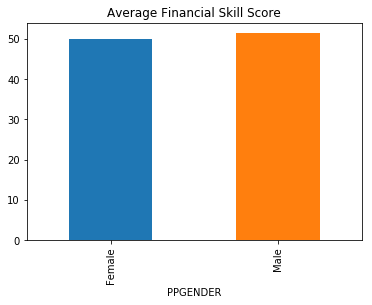

In [192]:
fs_score_gender['FSscore_avg'].plot.bar(title='Average Financial Skill Score')

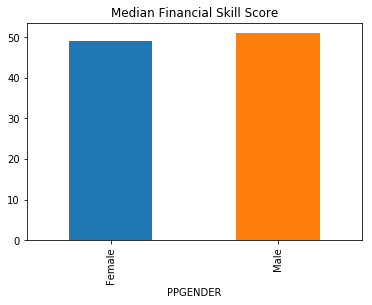

In [193]:
fs_score_gender['FSscore_median'].plot.bar(title='Median Financial Skill Score')

--- RACE/ETHNICITY ---

In [194]:
fs_score_eth = fin_lit_df.loc[:,['PPETHM','FSscore']].groupby(['PPETHM']).sum()
fs_score_eth['Participant_Count'] = fin_lit_df.loc[:,['PPETHM','FSscore']].groupby(['PPETHM']).count().rename(columns={'FSscore':'Participant_Count'})['Participant_Count']
fs_score_eth['FSscore_avg'] = fin_lit_df.loc[:,['PPETHM','FSscore']].groupby(['PPETHM']).mean()
fs_score_eth['FSscore_median'] = fin_lit_df.loc[:,['PPETHM','FSscore']].groupby(['PPETHM']).median()
fs_score_eth


,FSscore,Participant_Count,FSscore_avg,FSscore_median
PPETHM,,,,
"Black, Non-Hispanic",34979,685,51.064234,50
Hispanic,42463,875,48.529143,47
"Other, Non-Hispanic",16790,336,49.970238,48
"White, Non-Hispanic",230066,4498,51.148510,51


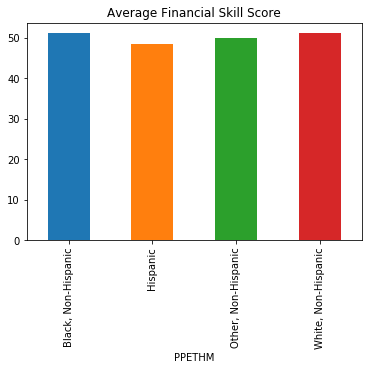

In [195]:
fs_score_eth['FSscore_avg'].plot.bar(title='Average Financial Skill Score')

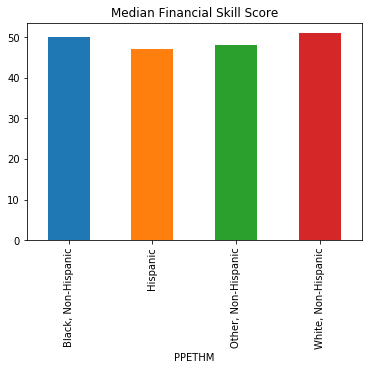

In [196]:
fs_score_eth['FSscore_median'].plot.bar(title='Median Financial Skill Score')

--- AGE ---

In [197]:
fs_score_age = fin_lit_df.loc[:,['agecat','FSscore']].groupby(['agecat']).sum()
fs_score_age['Participant_Count'] = fin_lit_df.loc[:,['agecat','FSscore']].groupby(['agecat']).count().rename(columns={'FSscore':'Participant_Count'})['Participant_Count']
fs_score_age['FSscore_avg'] = fin_lit_df.loc[:,['agecat','FSscore']].groupby(['agecat']).mean()
fs_score_age['FSscore_median'] = fin_lit_df.loc[:,['agecat','FSscore']].groupby(['agecat']).median()
fs_score_age

,FSscore,Participant_Count,FSscore_avg,FSscore_median
agecat,,,,
18-24,20419,414,49.321256,48
25-34,56148,1116,50.311828,49
35-44,41465,828,50.078502,48
45-54,53531,1075,49.796279,49
55-61,36127,708,51.026836,50
62-69,52989,1021,51.899119,51
70-74,25465,496,51.340726,51
75+,38154,736,51.839674,52


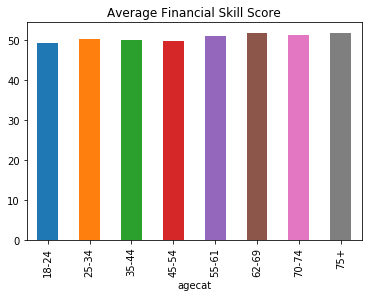

In [198]:
fs_score_age['FSscore_avg'].plot.bar(title='Average Financial Skill Score')

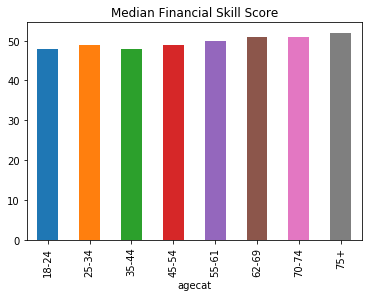

In [199]:
fs_score_age['FSscore_median'].plot.bar(title='Median Financial Skill Score')

#### Breakdown of Home Ownership by Demographic Information

In [265]:
homeown_cols = ['HOUSING','HOUSERANGES','MORTGAGE']
homeown_cols = demographic_cols + homeown_cols

In [266]:
homeown_df = filtered_df.loc[:,homeown_cols]
homeown_df = homeown_df.astype('int')
homeown_df = homeown_df.replace(value_map)
homeown_df.head()

,PUF_ID,PPGENDER,PPETHM,agecat,HOUSING,HOUSERANGES,MORTGAGE
0,10350,Male,"White, Non-Hispanic",75+,I own my home,4,"$50,000-199,999"
1,7740,Male,"White, Non-Hispanic",35-44,I own my home,4,"$50,000-199,999"
2,13699,Male,"Black, Non-Hispanic",35-44,I own my home,3,"$50,000-199,999"
3,7267,Male,"White, Non-Hispanic",35-44,Refused,99,Question not asked because respondent not in i...
4,7375,Male,"Other, Non-Hispanic",25-34,I rent,2,Question not asked because respondent not in i...


--- GENDER ---

In [267]:
gender_totals = homeown_df.loc[:,['PUF_ID','PPGENDER']].groupby(['PPGENDER']).count().reset_index().rename(columns={'PUF_ID':'Count_Total'})
gender_totals

,PPGENDER,Count_Total
0,Female,3042
1,Male,3352


In [357]:
homeown_gender = homeown_df.loc[:,['PUF_ID','PPGENDER','HOUSING']].groupby(['PPGENDER','HOUSING']).count().rename(columns={'PUF_ID':'Participant_Count'}).reset_index()
homeown_gender = homeown_gender.merge(gender_totals)
homeown_gender['Gender_proportion'] = homeown_gender['Participant_Count'] / homeown_gender['Count_Total']
homeown_gender = homeown_gender.set_index(['HOUSING'])
homeown_gender

,PPGENDER,Participant_Count,Count_Total,Gender_proportion
HOUSING,,,,
I do not currently own or rent,Female,262,3042,0.086128
I own my home,Female,1958,3042,0.643655
I rent,Female,799,3042,0.262656
Refused,Female,23,3042,0.007561
I do not currently own or rent,Male,283,3352,0.084427
I own my home,Male,2206,3352,0.658115
I rent,Male,844,3352,0.251790
Refused,Male,19,3352,0.005668


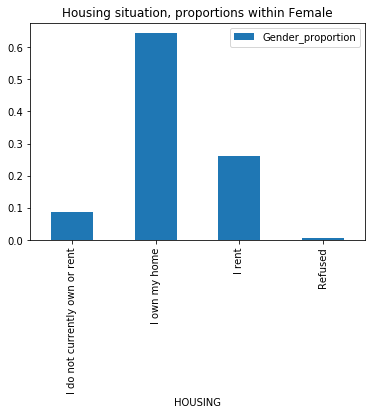

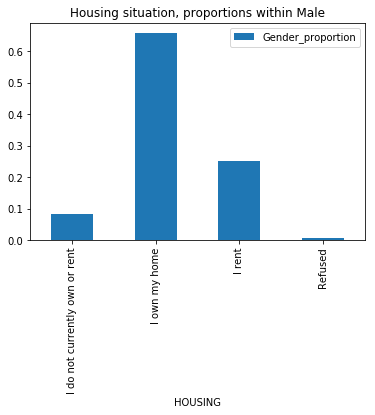

In [360]:
gender_vals = homeown_gender['PPGENDER'].unique()
for g in gender_vals:
    homeown_gender[homeown_gender['PPGENDER'] == g].loc[:,['Gender_proportion']].plot.bar(title='Housing situation, proportions within %s' % (g))


In [361]:
homeown_range_gender = homeown_df.loc[:,['PUF_ID','PPGENDER','HOUSERANGES']].groupby(['PPGENDER','HOUSERANGES']).count().rename(columns={'PUF_ID':'Participant_Count'}).reset_index()
homeown_range_gender = homeown_range_gender.merge(gender_totals)
homeown_range_gender['Gender_proportion'] = homeown_range_gender['Participant_Count'] / homeown_range_gender['Count_Total']
homeown_range_gender = homeown_range_gender.replace({
    "HOUSERANGES":{
      -1: "Refused",
      1: "Less than $300",
      2: "$300-499",
      3: "$500-749",
      4: "$750-999",
      5: "$1,000-1,499",
      6: "$1,500-1,999",
      7: "$2,000 or more",
      98: "I dont know",
      99: "Prefer not to say"
    },})
homeown_range_gender = homeown_range_gender.set_index(['HOUSERANGES'])
homeown_range_gender

,PPGENDER,Participant_Count,Count_Total,Gender_proportion
HOUSERANGES,,,,
Refused,Female,41,3042,0.013478
Less than $300,Female,499,3042,0.164037
$300-499,Female,226,3042,0.074293
$500-749,Female,459,3042,0.150888
$750-999,Female,403,3042,0.132479
"$1,000-1,499",Female,455,3042,0.149573
"$1,500-1,999",Female,232,3042,0.076266
"$2,000 or more",Female,235,3042,0.077252
I dont know,Female,129,3042,0.042406


Female
Male


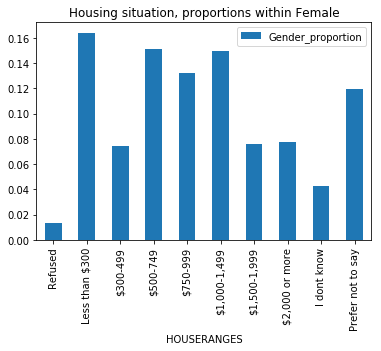

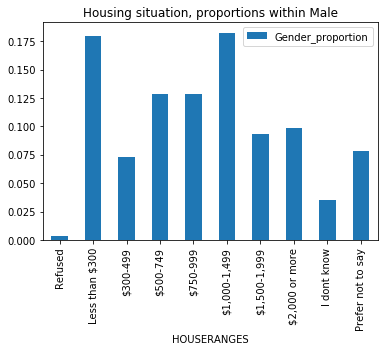

In [362]:
# gender_vals = homeown_gender['PPGENDER'].unique()
for g in gender_vals:
    print(g)
    homeown_range_gender[homeown_range_gender['PPGENDER'] == g].loc[:,['Gender_proportion']].plot.bar(title='Housing situation, proportions within %s' % (g))
    

--- RACE/ETHNICITY ---

In [238]:
eth_totals = homeown_df.loc[:,['PUF_ID','PPETHM']].groupby(['PPETHM']).count().reset_index().rename(columns={'PUF_ID':'Count_Total'})
eth_totals


,PPETHM,Count_Total
0,"Black, Non-Hispanic",685
1,Hispanic,875
2,"Other, Non-Hispanic",336
3,"White, Non-Hispanic",4498


In [242]:
homeown_eth = homeown_df.loc[:,['PUF_ID','PPETHM','HOUSING']].groupby(['PPETHM','HOUSING']).count().rename(columns={'PUF_ID':'Participant_Count'}).reset_index()
homeown_eth = homeown_eth.merge(eth_totals)
homeown_eth['Ethnicity_proportion'] = homeown_eth['Participant_Count'] / homeown_eth['Count_Total']
homeown_eth = homeown_eth.set_index(['PPETHM','HOUSING'])
homeown_eth

Participant_Count  \
PPETHM              HOUSING                                             
Black, Non-Hispanic I do not currently own or rent                 76   
                    I own my home                                 308   
                    I rent                                        296   
                    Refused                                         5   
Hispanic            I do not currently own or rent                101   
                    I own my home                                 396   
                    I rent                                        372   
                    Refused                                         6   
Other, Non-Hispanic I do not currently own or rent                 41   
                    I own my home                                 185   
                    I rent                                        108   
                    Refused                                         2   
White, Non-Hispanic I do not currently own or rent                327   
                    I own my home                                3275   
                    I rent                                        867   
                    Refused                                        29   

                                                    Count_Total  \
PPETHM              HOUSING                                       
Black, Non-Hispanic I do not currently own or rent          685   
                    I own my home                           685   
                    I rent                                  685   
                    Refused                                 685   
Hispanic            I do not currently own or rent          875   
                    I own my home                           875   
                    I rent                                  875   
                    Refused                                 875   
Other, Non-Hispanic I do not currently own or rent          336   
                    I own my home                           336   
                    I rent                                  336   
                    Refused                                 336   
White, Non-Hispanic I do not currently own or rent         4498   
                    I own my home                          4498   
                    I rent                                 4498   
                    Refused                                4498   

                                                    Ethnicity_proportion  
PPETHM              HOUSING                                               
Black, Non-Hispanic I do not currently own or rent              0.110949  
                    I own my home                               0.449635  
                    I rent                                      0.432117  
                    Refused                                     0.007299  
Hispanic            I do not currently own or rent              0.115429  
                    I own my home                               0.452571  
                    I rent                                      0.425143  
                    Refused                                     0.006857  
Other, Non-Hispanic I do not currently own or rent              0.122024  
                    I own my home                               0.550595  
                    I rent                                      0.321429  
                    Refused                                     0.005952  
White, Non-Hispanic I do not currently own or rent              0.072699  
                    I own my home                               0.728101  
                    I rent                                      0.192752  
                    Refused                                     0.006447

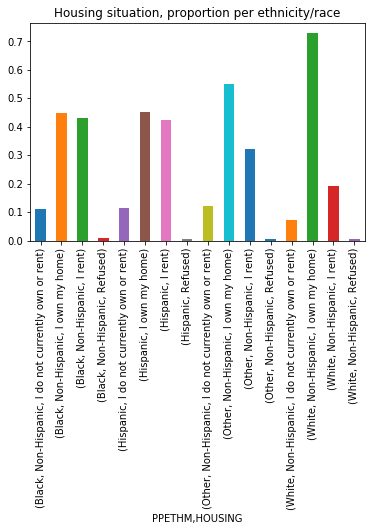

In [244]:
homeown_eth['Ethnicity_proportion'].plot.bar(title='Housing situation, proportion per ethnicity/race')

In [277]:
homeown_range_eth = homeown_df.loc[:,['PUF_ID','PPETHM','HOUSERANGES']].groupby(['PPETHM','HOUSERANGES']).count().rename(columns={'PUF_ID':'Participant_Count'}).reset_index()
homeown_range_eth = homeown_range_eth.merge(eth_totals)
homeown_range_eth['Ethnicity_proportion'] = homeown_range_eth['Participant_Count'] / homeown_range_eth['Count_Total']
homeown_range_eth = homeown_range_eth.replace({
    "HOUSERANGES":{
      -1: "Refused",
      1: "Less than $300",
      2: "$300-499",
      3: "$500-749",
      4: "$750-999",
      5: "$1,000-1,499",
      6: "$1,500-1,999",
      7: "$2,000 or more",
      98: "I dont know",
      99: "Prefer not to say"
    },})
homeown_range_eth = homeown_range_eth.set_index(['PPETHM','HOUSERANGES'])
homeown_range_eth

Participant_Count  Count_Total  \
PPETHM              HOUSERANGES                                         
Black, Non-Hispanic Refused                            6          685   
                    Less than $300                    75          685   
                    $300-499                          51          685   
                    $500-749                         143          685   
                    $750-999                         112          685   
                    $1,000-1,499                      92          685   
                    $1,500-1,999                      46          685   
                    $2,000 or more                    52          685   
                    I dont know                       27          685   
                    Prefer not to say                 81          685   
Hispanic            Refused                            3          875   
                    Less than $300                    69          875   
                    $300-499                          71          875   
                    $500-749                         137          875   
                    $750-999                         150          875   
                    $1,000-1,499                     186          875   
                    $1,500-1,999                      76          875   
                    $2,000 or more                    66          875   
                    I dont know                       36          875   
                    Prefer not to say                 81          875   
Other, Non-Hispanic Refused                            2          336   
                    Less than $300                    54          336   
                    $300-499                          23          336   
                    $500-749                          36          336   
                    $750-999                          37          336   
                    $1,000-1,499                      57          336   
                    $1,500-1,999                      26          336   
                    $2,000 or more                    50          336   
                    I dont know                       11          336   
                    Prefer not to say                 40          336   
White, Non-Hispanic Refused                           42         4498   
                    Less than $300                   903         4498   
                    $300-499                         326         4498   
                    $500-749                         573         4498   
                    $750-999                         534         4498   
                    $1,000-1,499                     731         4498   
                    $1,500-1,999                     397         4498   
                    $2,000 or more                   397         4498   
                    I dont know                      173         4498   
                    Prefer not to say                422         4498   

                                       Ethnicity_proportion  
PPETHM              HOUSERANGES                              
Black, Non-Hispanic Refused                        0.008759  
                    Less than $300                 0.109489  
                    $300-499                       0.074453  
                    $500-749                       0.208759  
                    $750-999                       0.163504  
                    $1,000-1,499                   0.134307  
                    $1,500-1,999                   0.067153  
                    $2,000 or more                 0.075912  
                    I dont know                    0.039416  
                    Prefer not to say              0.118248  
Hispanic            Refused                        0.003429  
                    Less than $300                 0.078857  
                    $300-499                       0.081143  
                    $500-749              

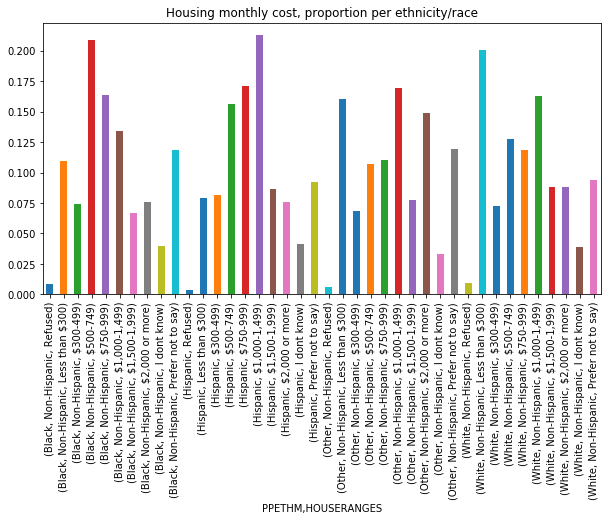

In [294]:
homeown_range_eth['Ethnicity_proportion'].plot.bar(title='Housing monthly cost, proportion per ethnicity/race',figsize=(10,5))

--- AGE ---

In [245]:
age_totals = homeown_df.loc[:,['PUF_ID','agecat']].groupby(['agecat']).count().reset_index().rename(columns={'PUF_ID':'Count_Total'})
age_totals

,agecat,Count_Total
0,18-24,414
1,25-34,1116
2,35-44,828
3,45-54,1075
4,55-61,708
5,62-69,1021
6,70-74,496
7,75+,736


In [249]:
homeown_age = homeown_df.loc[:,['PUF_ID','agecat','HOUSING']].groupby(['agecat','HOUSING']).count().rename(columns={'PUF_ID':'Participant_Count'}).reset_index()
homeown_age = homeown_age.merge(age_totals)
homeown_age['Age_proportion'] = homeown_age['Participant_Count'] / homeown_age['Count_Total']
homeown_age = homeown_age.set_index(['agecat','HOUSING'])
homeown_age

Participant_Count  Count_Total  \
agecat HOUSING                                                          
18-24  I do not currently own or rent                193          414   
       I own my home                                  32          414   
       I rent                                        184          414   
       Refused                                         5          414   
25-34  I do not currently own or rent                173         1116   
       I own my home                                 405         1116   
       I rent                                        526         1116   
       Refused                                        12         1116   
35-44  I do not currently own or rent                 46          828   
       I own my home                                 507          828   
       I rent                                        273          828   
       Refused                                         2          828   
45-54  I do not currently own or rent                 46         1075   
       I own my home                                 770         1075   
       I rent                                        252         1075   
       Refused                                         7         1075   
55-61  I do not currently own or rent                 25          708   
       I own my home                                 541          708   
       I rent                                        139          708   
       Refused                                         3          708   
62-69  I do not currently own or rent                 28         1021   
       I own my home                                 858         1021   
       I rent                                        130         1021   
       Refused                                         5         1021   
70-74  I do not currently own or rent                  6          496   
       I own my home                                 437          496   
       I rent                                         52          496   
       Refused                                         1          496   
75+    I do not currently own or rent                 28          736   
       I own my home                                 614          736   
       I rent                                         87          736   
       Refused                                         7          736   

                                       Age_proportion  
agecat HOUSING                                         
18-24  I do not currently own or rent        0.466184  
       I own my home                         0.077295  
       I rent                                0.444444  
       Refused                               0.012077  
25-34  I do not currently own or rent        0.155018  
       I own my home                         0.362903  
       I rent                                0.471326  
       Refused                               0.010753  
35-44  I do not currently own or rent        0.055556  
       I own my home                         0.612319  
       I rent                                0.329710  
       Refused                               0.002415  
45-54  I do not currently own or rent        0.042791  
       I own my home                         0.716279  
       I rent                                0.234419  
       Refused                               0.006512  
55-61  I do not currently own or rent        0.035311  
       I own my home                         0.764124  
       I rent                                0.196328  
       Refused                               0.004237  
62-69  I do not currently own or rent        0.027424  
       I own my home                         0.840353  
       I rent                                0.127326  
       Refused                               0.004897  
70-74  I do not currently own or rent        0.012097  
       I own my home                        

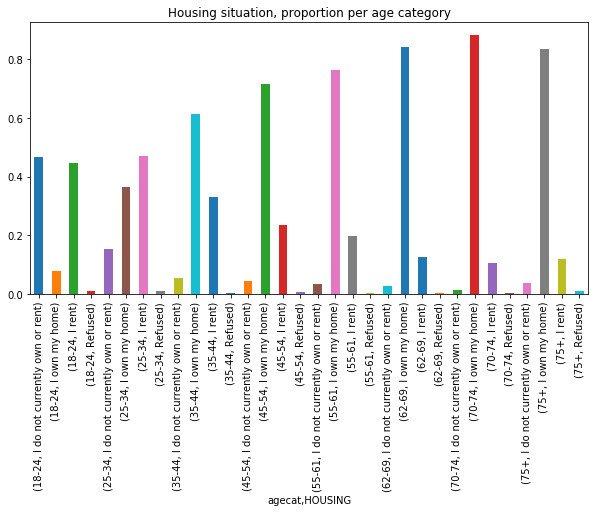

In [295]:
homeown_age['Age_proportion'].plot.bar(title='Housing situation, proportion per age category',figsize=(10,5))

In [288]:
homeown_range_age = homeown_df.loc[:,['PUF_ID','agecat','HOUSERANGES']].groupby(['agecat','HOUSERANGES']).count().rename(columns={'PUF_ID':'Participant_Count'}).reset_index()
homeown_range_age = homeown_range_age.merge(age_totals)
homeown_range_age['Age_proportion'] = homeown_range_age['Participant_Count'] / homeown_range_age['Count_Total']
homeown_range_age = homeown_range_age.replace({
    "HOUSERANGES":{
      -1: "Refused",
      1: "Less than $300",
      2: "$300-499",
      3: "$500-749",
      4: "$750-999",
      5: "$1,000-1,499",
      6: "$1,500-1,999",
      7: "$2,000 or more",
      98: "I dont know",
      99: "Prefer not to say"
    },})
homeown_range_age = homeown_range_age.set_index(['agecat','HOUSERANGES'])
homeown_range_age

Participant_Count  Count_Total  Age_proportion
agecat HOUSERANGES                                                      
18-24  Less than $300                    52          414        0.125604
       $300-499                          49          414        0.118357
       $500-749                          98          414        0.236715
       $750-999                          56          414        0.135266
       $1,000-1,499                      39          414        0.094203
       $1,500-1,999                      12          414        0.028986
       $2,000 or more                    15          414        0.036232
       I dont know                       67          414        0.161836
       Prefer not to say                 26          414        0.062802
25-34  Refused                            1         1116        0.000896
       Less than $300                    83         1116        0.074373
       $300-499                          95         1116        0.085125
       $500-749                         214         1116        0.191756
       $750-999                         212         1116        0.189964
       $1,000-1,499                     220         1116        0.197133
       $1,500-1,999                     102         1116        0.091398
       $2,000 or more                    93         1116        0.083333
       I dont know                       36         1116        0.032258
       Prefer not to say                 60         1116        0.053763
35-44  Refused                            1          828        0.001208
       Less than $300                    60          828        0.072464
       $300-499                          47          828        0.056763
       $500-749                         104          828        0.125604
       $750-999                         136          828        0.164251
       $1,000-1,499                     196          828        0.236715
       $1,500-1,999                     112          828        0.135266
       $2,000 or more                   104          828        0.125604
       I dont know                       17          828        0.020531
       Prefer not to say                 51          828        0.061594
45-54  Refused                            5         1075        0.004651
...                                     ...          ...             ...
62-69  Refused                           18         1021        0.017630
       Less than $300                   273         1021        0.267385
       $300-499                          76         1021        0.074437
       $500-749                         117         1021        0.114594
       $750-999                          96         1021        0.094025
       $1,000-1,499                     142         1021        0.139079
       $1,500-1,999                      68         1021        0.066601
       $2,000 or more                    73         1021        0.071499
       I dont know                       28         1021        0.027424
       Prefer not to say                130         1021        0.127326
70-74  Refused                           11          496        0.022177
       Less than $300                   141          496        0.284274
       $300-499                          30          496        0.060484
       $500-749                          60          496        0.120968
       $750-999                          48          496        0.096774
       $1,000-1,499                      48          496        0.096774
       $1,500-1,999                      21          496        0.042339
       $2,000 or more                    26          496        0.052419
       I dont know                       17          496        0.034274
       Prefer not to say                 94          496        0.189516
75+    Refused                           15          736        0.020380
       Less than $300                   242          736        0.328804
       $300

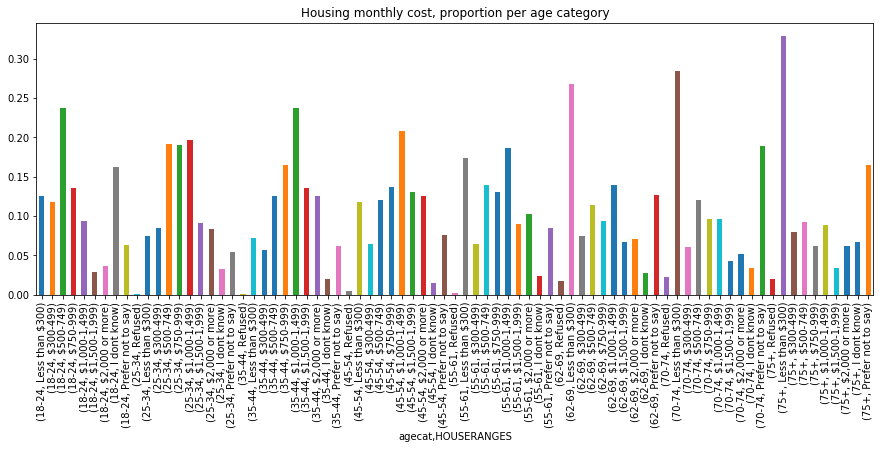

In [292]:
homeown_range_age['Age_proportion'].plot.bar(title='Housing monthly cost, proportion per age category',figsize=(15,5))

#### Breakdown of Debt-to-Income Ratio by Demographic Information

In [311]:
d_to_i_cols = ['PPINCIMP','PRODHAVE_8','PRODUSE_1','PRODUSE_2']
d_to_i_cols = demographic_cols + d_to_i_cols

In [313]:
income_df = filtered_df.loc[:,d_to_i_cols]
income_df = income_df.astype('int')
income_df = income_df.replace(value_map)
income_df.head()

,PUF_ID,PPGENDER,PPETHM,agecat,PPINCIMP,PRODHAVE_8,PRODUSE_1,PRODUSE_2
0,10350,Male,"White, Non-Hispanic",75+,7,No,No,No
1,7740,Male,"White, Non-Hispanic",35-44,6,No,No,No
2,13699,Male,"Black, Non-Hispanic",35-44,6,No,No,No
3,7267,Male,"White, Non-Hispanic",35-44,8,No,No,No
4,7375,Male,"Other, Non-Hispanic",25-34,7,No,No,Yes


--- GENDER ---

In [319]:
income_gender = income_df.loc[:,['PUF_ID','PPGENDER','PPINCIMP']].groupby(['PPGENDER','PPINCIMP']).count().rename(columns={'PUF_ID':'Participant_Count'}).reset_index()
income_gender = income_gender.merge(gender_totals)
income_gender['Proportion'] = income_gender['Participant_Count'] / income_gender['Count_Total']
income_gender = income_gender.replace({
    "PPINCIMP":{
      1: "Less than $20,000",
      2: "$20,000 to $29,999",
      3: "$30,000 to $39,999",
      4: "$40,000 to $49,999",
      5: "$50,000 to $59,999",
      6: "$60,000 to $74,999",
      7: "$75,000 to $99,999",
      8: "$100,000 to $149,999",
      9: "$150,000 or more"
    },
})
income_gender = income_gender.set_index(['PPGENDER','PPINCIMP'])
income_gender

Participant_Count  Count_Total  Proportion
PPGENDER PPINCIMP                                                        
Female   Less than $20,000                   406         3042    0.133465
         $20,000 to $29,999                  282         3042    0.092702
         $30,000 to $39,999                  313         3042    0.102893
         $40,000 to $49,999                  231         3042    0.075937
         $50,000 to $59,999                  255         3042    0.083826
         $60,000 to $74,999                  293         3042    0.096318
         $75,000 to $99,999                  415         3042    0.136423
         $100,000 to $149,999                483         3042    0.158777
         $150,000 or more                    364         3042    0.119658
Male     Less than $20,000                   313         3352    0.093377
         $20,000 to $29,999                  224         3352    0.066826
         $30,000 to $39,999                  301         3352    0.089797
         $40,000 to $49,999                  236         3352    0.070406
         $50,000 to $59,999                  250         3352    0.074582
         $60,000 to $74,999                  358         3352    0.106802
         $75,000 to $99,999                  540         3352    0.161098
         $100,000 to $149,999                632         3352    0.188544
         $150,000 or more                    498         3352    0.148568

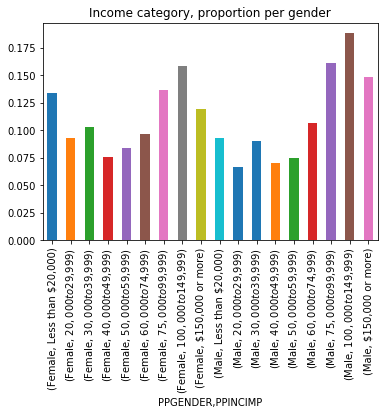

In [320]:
income_gender['Proportion'].plot.bar(title='Income category, proportion per gender')

--- RACE/ETHNICITY ---

In [321]:
income_eth = income_df.loc[:,['PUF_ID','PPETHM','PPINCIMP']].groupby(['PPETHM','PPINCIMP']).count().rename(columns={'PUF_ID':'Participant_Count'}).reset_index()
income_eth = income_eth.merge(eth_totals)
income_eth['Proportion'] = income_eth['Participant_Count'] / income_eth['Count_Total']
income_eth = income_eth.replace({
    "PPINCIMP":{
      1: "Less than $20,000",
      2: "$20,000 to $29,999",
      3: "$30,000 to $39,999",
      4: "$40,000 to $49,999",
      5: "$50,000 to $59,999",
      6: "$60,000 to $74,999",
      7: "$75,000 to $99,999",
      8: "$100,000 to $149,999",
      9: "$150,000 or more"
    },
})
income_eth = income_eth.set_index(['PPETHM','PPINCIMP'])
income_eth

Participant_Count  Count_Total  \
PPETHM              PPINCIMP                                               
Black, Non-Hispanic Less than $20,000                   164          685   
                    $20,000 to $29,999                   63          685   
                    $30,000 to $39,999                   74          685   
                    $40,000 to $49,999                   58          685   
                    $50,000 to $59,999                   53          685   
                    $60,000 to $74,999                   50          685   
                    $75,000 to $99,999                   83          685   
                    $100,000 to $149,999                 76          685   
                    $150,000 or more                     64          685   
Hispanic            Less than $20,000                   194          875   
                    $20,000 to $29,999                  108          875   
                    $30,000 to $39,999                  122          875   
                    $40,000 to $49,999                   64          875   
                    $50,000 to $59,999                   64          875   
                    $60,000 to $74,999                   74          875   
                    $75,000 to $99,999                  101          875   
                    $100,000 to $149,999                 90          875   
                    $150,000 or more                     58          875   
Other, Non-Hispanic Less than $20,000                    36          336   
                    $20,000 to $29,999                   24          336   
                    $30,000 to $39,999                   26          336   
                    $40,000 to $49,999                   25          336   
                    $50,000 to $59,999                   18          336   
                    $60,000 to $74,999                   32          336   
                    $75,000 to $99,999                   58          336   
                    $100,000 to $149,999                 63          336   
                    $150,000 or more                     54          336   
White, Non-Hispanic Less than $20,000                   325         4498   
                    $20,000 to $29,999                  311         4498   
                    $30,000 to $39,999                  392         4498   
                    $40,000 to $49,999                  320         4498   
                    $50,000 to $59,999                  370         4498   
                    $60,000 to $74,999                  495         4498   
                    $75,000 to $99,999                  713         4498   
                    $100,000 to $149,999                886         4498   
                    $150,000 or more                    686         4498   

                                          Proportion  
PPETHM              PPINCIMP                          
Black, Non-Hispanic Less than $20,000       0.239416  
                    $20,000 to $29,999      0.091971  
                    $30,000 to $39,999      0.108029  
                    $40,000 to $49,999      0.084672  
                    $50,000 to $59,999      0.077372  
                    $60,000 to $74,999      0.072993  
                    $75,000 to $99,999      0.121168  
                    $100,000 to $149,999    0.110949  
                    $150,000 or more        0.093431  
Hispanic            Less than $20,000       0.221714  
                    $20,000 to $29,999      0.123429  
                    $30,000 to $39,999      0.139429  
                    $40,000 to $49,999      0.073143  
                    $50,000 to $59,999      0.073143  
                    $60,000 to $74,999      0.084571  
                    $75,000 to $99,999      0.115429  
                    $100,000 to $149,999    0.102857  
                    $150,000 or more        0.066286  
Other, Non-Hispanic Less than $20,000       0.107143 

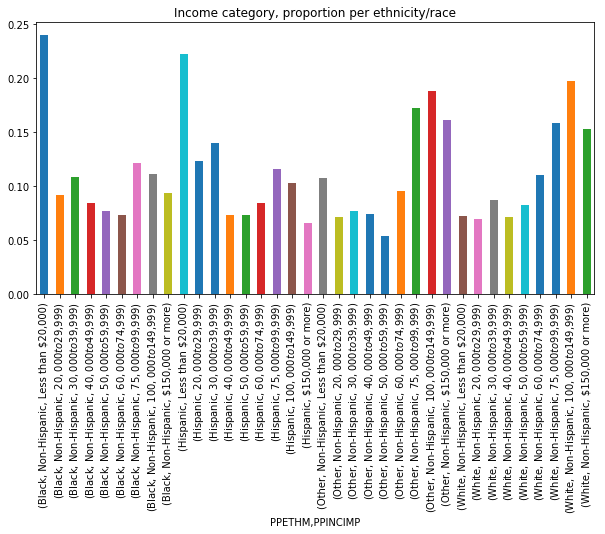

In [323]:
income_eth['Proportion'].plot.bar(title='Income category, proportion per ethnicity/race',figsize=(10,5))

--- AGE ---

In [324]:
income_age = income_df.loc[:,['PUF_ID','agecat','PPINCIMP']].groupby(['agecat','PPINCIMP']).count().rename(columns={'PUF_ID':'Participant_Count'}).reset_index()
income_age = income_age.merge(age_totals)
income_age['Proportion'] = income_age['Participant_Count'] / income_age['Count_Total']
income_age = income_age.replace({
    "PPINCIMP":{
      1: "Less than $20,000",
      2: "$20,000 to $29,999",
      3: "$30,000 to $39,999",
      4: "$40,000 to $49,999",
      5: "$50,000 to $59,999",
      6: "$60,000 to $74,999",
      7: "$75,000 to $99,999",
      8: "$100,000 to $149,999",
      9: "$150,000 or more"
    },
})
income_age = income_age.set_index(['agecat','PPINCIMP'])
income_age

Participant_Count  Count_Total  Proportion
agecat PPINCIMP                                                        
18-24  Less than $20,000                    83          414    0.200483
       $20,000 to $29,999                   36          414    0.086957
       $30,000 to $39,999                   36          414    0.086957
       $40,000 to $49,999                   36          414    0.086957
       $50,000 to $59,999                   30          414    0.072464
       $60,000 to $74,999                   34          414    0.082126
       $75,000 to $99,999                   45          414    0.108696
       $100,000 to $149,999                 70          414    0.169082
       $150,000 or more                     44          414    0.106280
25-34  Less than $20,000                   176         1116    0.157706
       $20,000 to $29,999                   87         1116    0.077957
       $30,000 to $39,999                  103         1116    0.092294
       $40,000 to $49,999                   98         1116    0.087814
       $50,000 to $59,999                   86         1116    0.077061
       $60,000 to $74,999                  136         1116    0.121864
       $75,000 to $99,999                  139         1116    0.124552
       $100,000 to $149,999                166         1116    0.148746
       $150,000 or more                    125         1116    0.112007
35-44  Less than $20,000                    88          828    0.106280
       $20,000 to $29,999                   50          828    0.060386
       $30,000 to $39,999                   88          828    0.106280
       $40,000 to $49,999                   50          828    0.060386
       $50,000 to $59,999                   64          828    0.077295
       $60,000 to $74,999                   82          828    0.099034
       $75,000 to $99,999                  135          828    0.163043
       $100,000 to $149,999                157          828    0.189614
       $150,000 or more                    114          828    0.137681
45-54  Less than $20,000                   124         1075    0.115349
       $20,000 to $29,999                   70         1075    0.065116
       $30,000 to $39,999                   79         1075    0.073488
...                                        ...          ...         ...
55-61  $75,000 to $99,999                  106          708    0.149718
       $100,000 to $149,999                155          708    0.218927
       $150,000 or more                    132          708    0.186441
62-69  Less than $20,000                    94         1021    0.092067
       $20,000 to $29,999                   75         1021    0.073457
       $30,000 to $39,999                   93         1021    0.091087
       $40,000 to $49,999                   80         1021    0.078355
       $50,000 to $59,999                   85         1021    0.083252
       $60,000 to $74,999                  126         1021    0.123408
       $75,000 to $99,999                  169         1021    0.165524
       $100,000 to $149,999                167         1021    0.163565
       $150,000 or more                    132         1021    0.129285
70-74  Less than $20,000                    36          496    0.072581
       $20,000 to $29,999                   50          496    0.100806
       $30,000 to $39,999                   55          496    0.110887
       $40,000 to $49,999                   39          496    0.078629
       $50,000 to $59,999                   53          496    0.106855
       $60,000 to $74,999                   52          496    0.104839
       $75,000 to $99,999                   84          496    0.169355
       $100,000 to $149,999                 71          496    0.143145
       $150,000 or more                     56          496    0.112903
75+    Less than $20,000                    56          736    0.076087
       $20,000 to $29,999                   96          736    0.1304

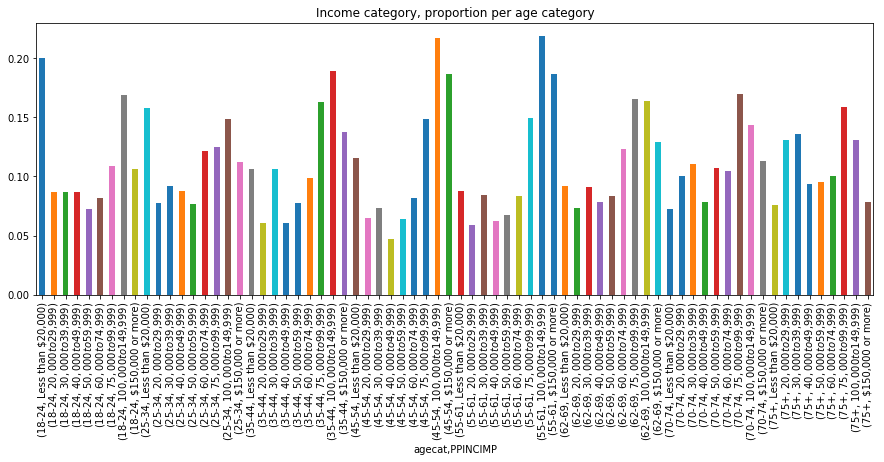

In [327]:
income_age['Proportion'].plot.bar(title='Income category, proportion per age category',figsize=(15,5))

## Patterns between financial literacy and financial success metrics

#### Any correlation between financial literacy education and each of our financial success metrics?

#### Any differences among different demographics?

--- GENDER ---

--- RACE/ETHNICITY ---

--- AGE ---

In [310]:
# Value mapping to actual responses; might come in handy when doing EDA
value_map = {
    "agecat":{
      1: "18-24",
      2: "25-34",
      3: "35-44",
      4: "45-54",
      5: "55-61",
      6: "62-69",
      7: "70-74",
      8: "75+"
    },
    "PPEDUC":{
      1: "Less than high school",
      2: "High school degree/GED",
      3: "Some college/Associate",
      4: "Bachelors degree",
      5: "Graduate/professional degree"
    },
    "PPETHM":{
      1: "White, Non-Hispanic",
      2: "Black, Non-Hispanic",
      3: "Other, Non-Hispanic",
      4: "Hispanic"
    },
    "PPGENDER":{
      1: "Male",
      2: "Female"
    },
#     "PPINCIMP":{
#       1: "Less than $20,000",
#       2: "$20,000 to $29,999",
#       3: "$30,000 to $39,999",
#       4: "$40,000 to $49,999",
#       5: "$50,000 to $59,999",
#       6: "$60,000 to $74,999",
#       7: "$75,000 to $99,999",
#       8: "$100,000 to $149,999",
#       9: "$150,000 or more"
#     },
    "PPHHSIZE":{
      1: "1",
      2: "2",
      3: "3",
      4: "4",
      5: "5+"
    },
    "fpl":{
      1: "<100% FPL",
      2: "100%-199% FPL",
      3: "200%+ FPL"
    },
    "PPREG4":{
      1: "Northeast",
      2: "Midwest",
      3: "South",
      4: "West"
    },
    "PPREG9":{
      1: "New England",
      2: "Mid-Atlantic",
      3: "East-North Central",
      4: "West-North Central",
      5: "South Atlantic",
      6: "East-South Central",
      7: "West-South Central",
      8: "Mountain",
      9: "Pacific"
    },
    "FWB1_1":{
      -4: "Response not written to database",
      -1: "Refused",
      1: "Not at all",
      2: "Very little",
      3: "Somewhat",
      4: "Very well",
      5: "Completely"
    },
    "FWB1_5":{
      -4: "Response not written to database",
      -1: "Refused",
      1: "Not at all",
      2: "Very little",
      3: "Somewhat",
      4: "Very well",
      5: "Completely"
    },
    "FS2_3":{
      -1: "Refused",
      1: "Never",
      2: "Rarely",
      3: "Sometimes",
      4: "Often",
      5: "Always"
    },
    "SUBKNOWL1":{
      -1: "Refused",
      1: "1 - Very low",
      2: "2",
      3: "3",
      4: "4",
      5: "5",
      6: "6",
      7: "7 - Very high"
    },
    "ACT1_2":{
      -1: "Refused",
      1: "Not at all",
      2: "Very little",
      3: "Somewhat",
      4: "Very well",
      5: "Completely"
    },
    "PROPPLAN_1":{
      -1: "Refused",
      1: "Strongly disagree",
      2: "Disagree",
      3: "Neither agree nor disagree",
      4: "Agree",
      5: "Strongly agree"
    },
    "PROPPLAN_3":{
      -1: "Refused",
      1: "Strongly disagree",
      2: "Disagree",
      3: "Neither agree nor disagree",
      4: "Agree",
      5: "Strongly agree"
    },
    "MANAGE1_1":{
      -1: "Refused",
      1: "Not applicable or never",
      2: "Seldom",
      3: "Sometimes",
      4: "Often",
      5: "Always"
    },
    "MANAGE1_2":{
      -1: "Refused",
      1: "Not applicable or never",
      2: "Seldom",
      3: "Sometimes",
      4: "Often",
      5: "Always"
    },
    "MANAGE1_3":{
      -1: "Refused",
      1: "Not applicable or never",
      2: "Seldom",
      3: "Sometimes",
      4: "Often",
      5: "Always"
    },
    "SAVEHABIT":{
      -1: "Refused",
      1: "Strongly disagree",
      2: "Disagree",
      3: "Disagree slightly",
      4: "Agree slightly",
      5: "Agree",
      6: "Strongly agree"
    },
    "AUTOMATED_1":{
      -1: "Refused",
      0: "No",
      1: "Yes",
      7: "I do not have this type of account"
    },
    "AUTOMATED_2":{
      -1: "Refused",
      0: "No",
      1: "Yes",
      7: "I do not have this type of account"
    },
    "SAVINGSRANGES":{
      -1: "Refused",
      1: "0",
      2: "$1-99",
      3: "$100-999",
      4: "$1,000-4,999",
      5: "$5,000-19,999",
      6: "$20,000-74,999",
      7: "$75,000 or more",
      98: "I dont know",
      99: "Prefer not to say"
    },
    "HOUSING":{
      -1: "Refused",
      1: "I own my home",
      2: "I rent",
      3: "I do not currently own or rent"
    },
#     "HOUSERANGES":{
#       -1: "Refused",
#       1: "Less than $300",
#       2: "$300-499",
#       3: "$500-749",
#       4: "$750-999",
#       5: "$1,000-1,499",
#       6: "$1,500-1,999",
#       7: "$2,000 or more",
#       98: "I dont know",
#       99: "Prefer not to say"
#     },
    "MORTGAGE":{
      -2: "Question not asked because respondent not in item base",
      -1: "Refused",
      1: "Less than $50,000",
      2: "$50,000-199,999",
      3: "$200,000 or more",
      98: "I dont know",
      99: "Prefer not to say"
    },
    "PRODHAVE_8":{
      0: "No",
      1: "Yes"
    },
    "PRODUSE_1":{
      0: "No",
      1: "Yes"
    },
    "PRODUSE_2":{
      0: "No",
      1: "Yes"
    },
    "FWBscore":{
      -4: "Response not written to database",
      -1: "Refused"
    },
#     "FSscore":{
#       -1: "Refused"
#     },
}